**Analyse et recommandation de films avec une base de données publique**

***

**Étape 1 : Téléchargement et Chargement des Données**

In [7]:
pip install pandas numpy


[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: pip3.12 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [8]:
# Importation des bibliothèques 
import pandas as pd
import os
print(os.getcwd())
os.chdir('/Users/jadelaurent/Downloads/ml-latest-small')
print(os.getcwd())

/Users/jadelaurent/Desktop
/Users/jadelaurent/Downloads/ml-latest-small


In [9]:
# Importations des données
movies = pd.read_csv("movies.csv")
ratings = pd.read_csv("ratings.csv")
tags = pd.read_csv("tags.csv")

***

**Étape 2 : Exploration et Analyse des Données**

Affichage d'un aperçu des données :

In [10]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [11]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [12]:
tags.head()

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


Vérifier les valeurs manquantes : 

In [13]:
movies.isnull().sum()

movieId    0
title      0
genres     0
dtype: int64

In [14]:
ratings.isnull().sum()

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

In [15]:
tags.isnull().sum()

userId       0
movieId      0
tag          0
timestamp    0
dtype: int64

Statistiques descriprives :

In [16]:
movies.describe()


,movieId
count,9742.000000
mean,42200.353623
std,52160.494854
min,1.000000
25%,3248.250000
50%,7300.000000
75%,76232.000000
max,193609.000000


In [17]:
ratings.describe()

,userId,movieId,rating,timestamp
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,326.127564,19435.295718,3.501557,1.205946e+09
std,182.618491,35530.987199,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,177.000000,1199.000000,3.000000,1.019124e+09
50%,325.000000,2991.000000,3.500000,1.186087e+09
75%,477.000000,8122.000000,4.000000,1.435994e+09
max,610.000000,193609.000000,5.000000,1.537799e+09


In [18]:
tags.describe()

,userId,movieId,timestamp
count,3683.000000,3683.000000,3.683000e+03
mean,431.149335,27252.013576,1.320032e+09
std,158.472553,43490.558803,1.721025e+08
min,2.000000,1.000000,1.137179e+09
25%,424.000000,1262.500000,1.137521e+09
50%,474.000000,4454.000000,1.269833e+09
75%,477.000000,39263.000000,1.498457e+09
max,610.000000,193565.000000,1.537099e+09


In [19]:
!pip install matplotlib

In [20]:
import sys
print(sys.executable)


/usr/local/bin/python3.12


In [21]:
import matplotlib.pyplot as plt

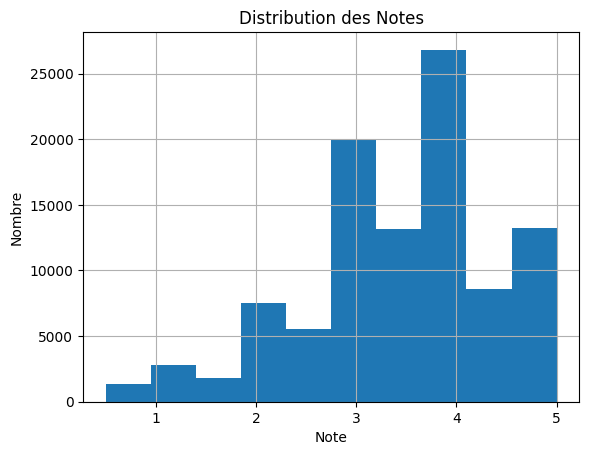

In [26]:
# Distribution des notes
ratings['rating'].hist(bins=10)
plt.title("Distribution des Notes")
plt.xlabel("Note")
plt.ylabel("Nombre")
plt.show()

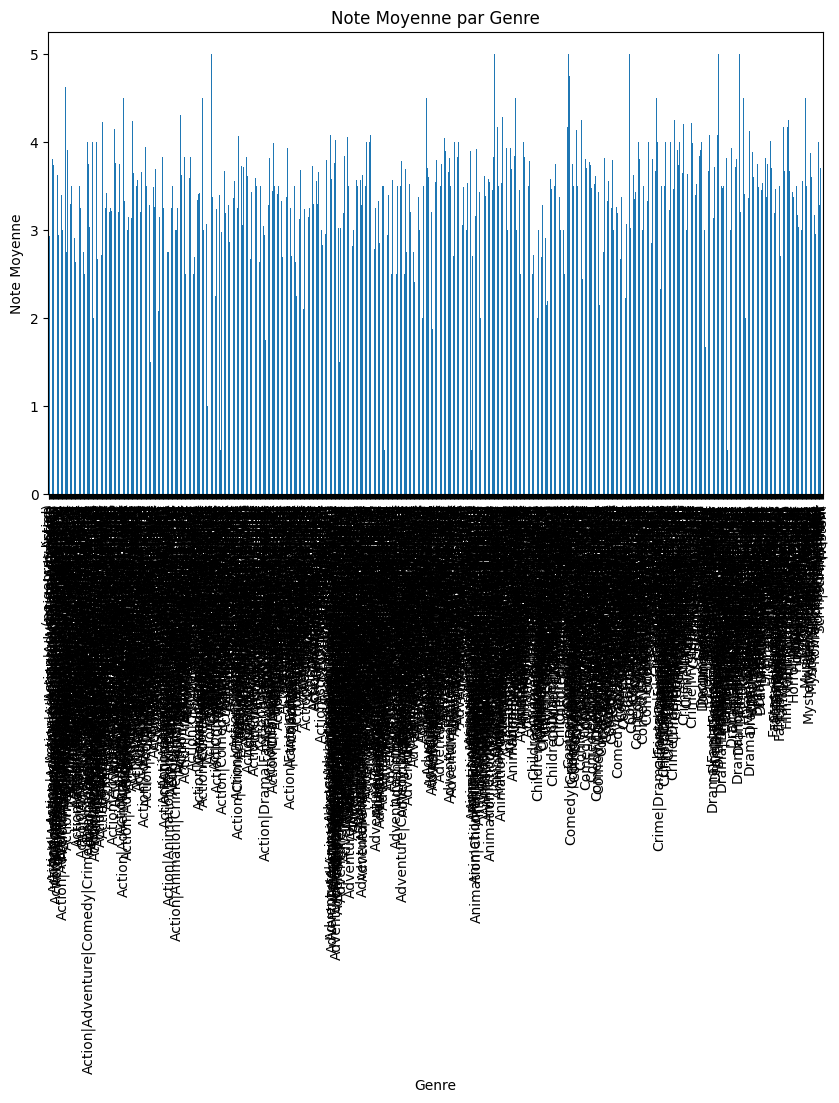

In [33]:
# Distribution des notes par genre
# Fusionner les tables ratings et movies sur le 'movieId'
merged_data = pd.merge(ratings, movies, on='movieId', how='left')
genre_ratings = merged_data.groupby('genres')['rating'].mean()
genre_ratings.plot(kind='bar', figsize=(10, 6))
plt.title("Note Moyenne par Genre")
plt.xlabel("Genre")
plt.ylabel("Note Moyenne")
plt.show()

NameError: name 'exploded_data' is not defined